# Исследование объявлений о продаже квартир

## Описание проекта

В рамках данного проекта используются данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. На основе предоставленных данных предстоит установить необходимые параметры объектов недвижимости, что позволит в дальнейшем построить автоматизированную систему, которая сможет определять рыночную стоимость объектов недвижимости, а также отслеживать аномалии и мошенническую деятельность.  
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных, такие, как расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Цель исследования

Определить основные параметры объектов недвижимости и определить их влияние на рыночную стоимость.

## Описание данных

*Датасет real_estate_data.csv*

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)  
**balcony** — число балконов  
**ceiling_height** — высота потолков (м)  
**cityCenters_nearest** — расстояние до центра города (м)  
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)  
**first_day_exposition** — дата публикации  
**floor** — этаж  
**floors_total** — всего этажей в доме  
**is_apartment** — апартаменты (булев тип)  
**kitchen_area** — площадь кухни в квадратных метрах (м²)  
**last_price** — цена на момент снятия с публикации  
**living_area** — жилая площадь в квадратных метрах (м²)  
**locality_name** — название населённого пункта  
**open_plan** — свободная планировка (булев тип)  
**parks_around3000** — число парков в радиусе 3 км  
**parks_nearest** — расстояние до ближайшего парка (м)  
**ponds_around3000** — число водоёмов в радиусе 3 км  
**ponds_nearest** — расстояние до ближайшего водоёма (м)  
**rooms** — число комнат  
**studio** — квартира-студия (булев тип)  
**total_area** — площадь квартиры в квадратных метрах (м²)  
**total_images** — число фотографий квартиры в объявлении  

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

## Содержание

1 Обзор данных  
2 Предобработка данных  
2.1 Работа с пропущенными значениями  
2.2 Изменение типа данных  
2.3 Вывод  
3 Расчёты и добавление результатов в таблицу  
3.1 Цена квадратного метра  
3.2 День недели, месяц и год публикации объявления  
3.3 Данные по этажам  
3.4 Соотношения площадей  
3.5 Вывод  
4 Исследовательский анализ данных  
4.1 Изучение параметров объектов недвижимости и построение гистограмм  
4.2 Изучение времени продаж квартир  
4.3 Удаление редких и выбивающихся значений  
4.4 Факторы, влияющие на стоимость квартиры  
4.5 Стоимость квадратного метра жилья в населенных пунктах с наибольшим числом объявлений  
4.6 Зависимость цены от удаленности от центра  
4.7 Изучение сегмента квартир в центре  
4.8 Вывод  
5 Общий вывод

## 1 Обзор данных

Подключаем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Открываем и записываем файл:

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Просматриваем данные и изучаем общую информацию:

In [3]:
display(df.head())
df.info()
print('Кол-во дубликатов:', df.duplicated().sum())
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**На этапе обзора данных обнаружено следующее:**
1. Столбец **first_day_exposition** вместо типа `datetime` представлен типом `object`.
2. В столбце **rooms** минимальное значение комнат равно нулю, скорее всего, так могли заполнить данные владельцы квартир-студий.
3. В столбце **ceiling_height** есть пропуски и некорректные данные - min и max значения составляют соответственно 1 и 100м, что не может соответствовать действительности, поэтому и остальные значения будет необходимо также проверить.
4. Данные в столбце **floors_total** содержат пропуски, в столбце используются вещественные числа, которые лучше заменить на целочисленные значения.
5. В столце **living_area** также имеются пропуски.
6. Столбец **is_apartment** вместо типа `bool` представлен типом `object`, имеются пропуски.
7. Данные в столбце **kitchen_area** содержат пропуски.
8. Данные в столбце **balcony** содержат пропуски.
9. Данные в столбце **locality_name** содержат пропуски.
10. Данные в столбце **airports_nearest** содержат пропуски.
11. Данные в столбце **cityCenters_nearest** содержат пропуски.
12. Данные в столбце **parks_around3000** содержат пропуски, в столбце используются вещественные числа, которые лучше заменить на целочисленные значения.
13. Данные в столбце **parks_nearest** содержат пропуски.
14. Данные в столбце **ponds_around3000** содержат пропуски, в столбце используются вещественные числа, которые лучше заменить на целочисленные значения.
15. Данные в столбце **ponds_nearest** содержат пропуски.
16. Данные в столбце **days_exposition** содержат пропуски, в столбце используются вещественные числа, которые лучше заменить на целочисленные значения.

**Вывод:**

Самая распространенная проблема в данных - наличие пропусков. Кроме того, имеются неточности в типах данных и аномальные значения. Скорее всего, это связано с небрежностью заполнения данных. Возможные причины и варианты дальнейших действий, рассмотрим более детально в следующем разделе, поскольку для дальнейшей работы над проектом, сначала необходимо устранить проблемы в данных.

## 2 Предобработка данных

### 2.1 Работа с пропущенными значениями

Для начала посчитаем доли пропусков в разных столбцах, отсортированных по убыванию. Для этих целей хорошо подойдет сочетание следующих функций: `df.isna()` - найдет пропуски сразу во всех столбцах, `.mean()` посчитает долю пропусков по отношению к длине столбца, а `.sort_values(ascending=False)` отсортирует значения по убыванию.

In [4]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

Самый большой процент пропусков (88%) наблюдается в столбце **is_apartment**. Поскольку аппартаменты это особый вид недвижимости, в котором можно проживать, но нельзя зарегистрироваться, владельцы безусловно это знают и для них было бы бессмысленным скрывать данный факт от будущих покупателей. Вероятнее всего, отсутсвие значения в данном столбце, означает отсутствие принадлежности объекта недвижимости к категории аппартаменты. Согласно описанию, данный столбец содержит булев тип данных, поэтому заменяем все пропущенные значения на False и контролируем результат:

In [5]:
print('Пропуски до: {}'.format(df['is_apartment'].isna().sum()))
df['is_apartment'] = df['is_apartment'].fillna(value=False)  # заменяем пропущенные значения
print('Пропуски после: {}'.format(df['is_apartment'].isna().sum()))  # контролируем результат

Пропуски до: 20924
Пропуски после: 0


Аналогичным способом поступим с данными в столбце **balcony**. Поскольку количество балконов напрямую влияет на стоимость объекта недвижимости, забыть заполнить информацию по количеству балконов не представляется возможным, поэтому исходим из того, что при отсутсвии балкона, многие просто оставили соответствующее поле без внимания, что дает нам возможность произвести замену пропущенных значений на 0, с последующим контролем результата: 

In [6]:
print('Пропуски до: {}'.format(df['balcony'].isna().sum()))
df['balcony'] = df['balcony'].fillna(value=0)  # заменяем пропущенные значения
print('Пропуски после: {}'.format(df['balcony'].isna().sum()))  # контролируем результат

Пропуски до: 11519
Пропуски после: 0


В столбцах floors_total и locality_name зафиксировано наименьшее кол-во пропусков - 0,36% и 0,2% соответственно. Эти данные не могут статистически значимо повлиять на результат нашего иисследования, поэтому смело их удаляем.

In [7]:
print('Пропуски до: {}'.format(df['floors_total'].isna().sum()))
df.dropna(subset=['floors_total'], inplace=True)  # удаляем данные с пропущенными значениями
print('Пропуски после: {}'.format(df['floors_total'].isna().sum())) # контролируем результат

Пропуски до: 86
Пропуски после: 0


In [8]:
print('Пропуски до: {}'.format(df['locality_name'].isna().sum()))
df.dropna(subset=['locality_name'], inplace=True)  # удаляем данные с пропущенными значениями
print('Пропуски после: {}'.format(df['locality_name'].isna().sum()))  # контролируем результат

Пропуски до: 48
Пропуски после: 0


Пропущенные значения в столбцах, связанных с близостью к центру, аэропорту, паркам и водоемам, а также с количеством парков и водоемов по близости, трудно объяснимы, это могут быть как ошибки пользователей, так и ошибки системы при расчете координат. При этом, таких данных достаточно много - от 23,6% до 65,9%, чтобы от них отказаться. Допустимым методом здесь будет заполнение пропусков медианными значениями по населенным пунктам, а там где их нет - общим медианным значением.
Для начала проверим список уникальных значений населенных пунктов:

In [9]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видно, что при внесении данных использовались дублирующие названия типов населенных пунктов, к примеру: поселок и посёлок. Для начала исправим это, а затем, вернемся к заполнению пропусков.

In [10]:
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок')


Теперь приступаем к заполнению пропусков столбца **parks_nearest** медианным значением по городам, оставшися пропуски дозаполним общим медианным значением по датасету:
    

In [11]:
print('Пропуски до: {}'.format(df['parks_nearest'].isna().sum()))
df['parks_nearest'] = df['parks_nearest'].fillna(df.groupby('locality_name')['parks_nearest'].transform('median')) 
df['parks_nearest'].fillna(df['parks_nearest'].median(), inplace=True)  # дозаполнение общим медианным значением
print('Пропуски после: {}'.format(df['parks_nearest'].isna().sum()))  # контролируем  результат

Пропуски до: 15535
Пропуски после: 0


Проведем аналогичную процедуру для заполнения пропусков в столбцах **ponds_nearest, airports_nearest, cityCenters_nearest, ponds_around3000 и parks_around3000**:

In [12]:
print('Пропуски до {}'.format(df['ponds_nearest'].isna().sum()))
df['ponds_nearest'] = df['ponds_nearest'].fillna(df.groupby('locality_name')['ponds_nearest'].transform('median')) 
df['ponds_nearest'].fillna(df['ponds_nearest'].median(), inplace=True)  # дозаполнение общим медианным значением
print('Пропуски после: {}'.format(df['ponds_nearest'].isna().sum()))  # контролируем  результат

Пропуски до 14529
Пропуски после: 0


In [13]:
print('Пропуски до {}'.format(df['airports_nearest'].isna().sum()))
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform('median')) 
df['airports_nearest'].fillna(df['airports_nearest'].median(), inplace=True)  # дозаполнение общим медианным значением
print('Пропуски после {}'.format(df['airports_nearest'].isna().sum()))  # контролируем  результат

Пропуски до 5524
Пропуски после 0


In [14]:
print('Пропуски до: {}'.format(df['cityCenters_nearest'].isna().sum()))
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(
    df.groupby('locality_name')['cityCenters_nearest'].transform('median')) 
df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median(), inplace=True)  # дозаполнение общим медианным значением
print('Пропуски после: {}'.format(df['cityCenters_nearest'].isna().sum()))  # контролируем  результат

Пропуски до: 5501
Пропуски после: 0


In [15]:
print('Пропуски до {}'.format(df['ponds_around3000'].isna().sum()))
df['ponds_around3000'] = df['ponds_around3000'].fillna(df.groupby('locality_name')['ponds_around3000'].transform('median')) 
df['ponds_around3000'].fillna(df['ponds_around3000'].median(), inplace=True)  # дозаполнение общим медианным значением
print('Пропуски после: {}'.format(df['ponds_around3000'].isna().sum()))  # контролируем  результат

Пропуски до 5500
Пропуски после: 0


In [16]:
print('Пропуски до: {}'.format(df['parks_around3000'].isna().sum()))
df['parks_around3000'] = df['parks_around3000'].fillna(df.groupby('locality_name')['parks_around3000'].transform('median')) 
df['parks_around3000'].fillna(df['parks_around3000'].median(), inplace=True)  # дозаполняем общим медианным значением
print('Пропуски после: {}'.format(df['parks_nearest'].isna().sum()))  # контролируем  результат

Пропуски до: 5500
Пропуски после: 0


Пропущенные значения в столбце **ceiling_height** заполним также медианным значением, но в зависимости от этажности домов. Это позволит учесть, что высота потолков в малоэтажных строениях чаще всего бывает выше, а также, учесть тот факт, что распространенные типовые строения, часто имеют свои типовые значения по высоте потолков и количеству этажей.

In [17]:
print('Пропуски до: {}'.format(df['ceiling_height'].isna().sum()))
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform('median')) 
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)  # дозаполняем общим медианным значением
print('Пропуски после: {}'.format(df['ceiling_height'].isna().sum()))  # контролируем  результат

Пропуски до: 9084
Пропуски после: 0


В столбце **days_exposition** данные могут отсутствовать в связи с тем, что часть квартир могла быть еще не продана.  Поэтому, при заполнении пропущенных значений в столбце **days_exposition**, будем исходить из того, что объявления были открыты по крайней мере до момента выгрузки данных. Поскольку точная дата тоже не известна, можно принять за нее дату крайней записи в столбце **first_day_exposition**. Для этого, преобразуем тип данных столбца **first_day_exposition** в `datetime`, выберем и сохраним в отдельной переменой `max_dt` его максимальное значение, а затем вычислим разницу между `max_dt` и **first_day_exposition** и заполним пропуски полученными данными:

In [18]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition']) # переводим данные столбца в тип datetime
print('Пропуски до: {}'.format(df['days_exposition'].isna().sum())) # выводим для контроля кол-во пропусков до заполнения
max_dt = df['first_day_exposition'].max() # выбираем краюнюю дату публикации

# заполняем пропуски
df.loc[df['days_exposition'].isna(), 'days_exposition'] = (max_dt - df.loc[df['days_exposition'].isna(), 'first_day_exposition']).dt.days
print('Пропуски после: {}'.format(df['days_exposition'].isna().sum()))  # контролируем результат

Пропуски до: 3171
Пропуски после: 0


Теперь приступим к столбцу **living_area**. Имеющихся данных, для установления связи между размером жилой площади и какими-либо другими параметрами недвижимости, не достаточно (у нас есть только общая площадь, а она, помимо жилой площади и кухни, включает в себя коридоры и санузлы). Поэтому, остановимся на вычислении медианной доли жилой площади относительно общей площади, с последующим заполнением пропусков путем перемножения медианной доли на общую площадь каждого объекта.

In [19]:
print('Пропуски до: {}'.format(df['living_area'].isna().sum()))  # выводим для контроля кол-во пропусков до заполнения
living_ratio = df['living_area'].mean() / df['total_area'].mean()  # вычисляем медианную долю жилой площади относительно общей площади
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)  # заполняем пропуски
print('Пропуски после: {}'.format(df['living_area'].isna().sum()))  # контролируем результат

Пропуски до: 1865
Пропуски после: 0


Заполнение пропусков в столбце **kitchen_area** начнем с квартир-студий. Как известно, в таких квартирах кухонная зона вместе с комнатой составляют единое жилое пространство, при этом, считать, что в студии нет кухни или ее площадь равна жилой, неверно. Юридически минимальное кухонное пространство должно составлять 5 квадратных метров, весь остальной метраж (не считая санузла и коридора) считается жилым. Поэтому, заполним данные по таким квартирам значением из норматива 5кв.м., а затем, дозаполним оставшиеся пропуски по аналогии со столбцом **living_area**, через вычисление медианной доли площади кухни относительно общей  площади.

In [20]:
print('Пропуски до: {}'.format(df['kitchen_area'].isna().sum()))  # выводим для контроля кол-во пропусков до заполнения
df.loc[df['studio'] == True, 'kitchen_area'] = 5  # заполняем данные по квартирам-студиям

kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean()  # вычисляем медианную долю площади кухни относительно общей площади
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True) # дозаполняем данные для остальных квартир
print('Пропуски после: {}'.format(df['kitchen_area'].isna().sum()))  # контролируем результат

Пропуски до: 2222
Пропуски после: 0


В столбце **rooms** встречаются нулевые значения. Поскольку мы рассматриваем в проекте объекты недвижимости с жилой площадью, минимальным значением числа комнат может быть 1. Проведем замену и проверим все уникальные значения:

In [21]:
df.loc[df['rooms'] == 0, 'rooms'] = 1  # замена числа комнат
df['rooms'].unique()  # проверка уникальных значений столбца

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

Теперь квартир без комнат не осталось, хотя есть еще подозрительно большие значения количества комнат. Оставим пока эти данные без изменений (как и данные столбца **ceiling_heigt**, где встречается высота потолков от 1 до 100 метров.), поскольку рассмотрим их более детально в 4 разделе данного проекта.

### 2.2 Изменение типа данных

В столбцах **floors_total, balcony, parks_around3000, ponds_around3000 и days_exposition**, где количество этажей, балконов, парков, водоемов, а также количество дней размещения объявлений, по определению являются целочисленными значениями, поэтому изменим тип данных в этих столбцах с вещественного (float) на целочисленный (int):

In [22]:
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### 2.3 Вывод

Финальная проверка общей информации показала, что теперь в данных отсутствуют пропуски, все данные приведены к необходимому типу и готовы для дальнейшего ипользования в проекте. Что касается совершенствования процесса сбора данных - здесь можно было бы доработать форму внесения заявок в базу данных, к примеру, внести в полях логические числовые ограничения, запретить отправку формы без заполнения необходимых полей, а также усовершенствовать автоматические алогоритмы обработки и записи данных. Такие мероприятия помогут получить на выходе необходимые для регулярного анализа данные в корректном виде, что позволит сэкономить время на их предобработке.

## 3 Расчёты и добавление результатов в таблицу

### 3.1 Цена квадратного метра

Для расчета цены за квадратный метр делим цену (на момент снятия публикации) **last_price** на площадь квартиры **total_area**, с округлением до сотых долей. Результат сохраняем в новый столбец **price_square_meter**:

In [23]:
df['price_square_meter'] = round(df['last_price'] / df['total_area'], 2)

### 3.2 День недели, месяц и год публикации объявления

Для удобства работы с данными, добавим столбцы с днем недели, месяцем и годом публикации:

In [24]:
df['weekday_expos'] = df['first_day_exposition'].dt.weekday  # столбец с днем недели публикации
df['month_expos'] = df['first_day_exposition'].dt.month  # столбец с месяцем публикации
df['year_expos'] = df['first_day_exposition'].dt.year  # столбец с годом публикации

### 3.3 Данные по этажам

Для категоризации данных по этажам, напишем функцию, с использованием метода apply для каждой строки датафрейма. В новом столбце **floor_category** для этажей получим три категории: **первый, последний, другой**.

In [25]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
df['floor_category'] = df.apply(floor_category, axis = 1)

### 3.4 Соотношения площадей

Посчитаем соотношение жилой площади и кухни к общей площади и добавим результат в соответствующие отдельные столбцы:

In [26]:
df['living_area_ratio'] = round(df['living_area'] / df['total_area'], 2)  # соотношение жилой площади к общей
df['kitchen_area_ratio'] = round(df['kitchen_area'] / df['total_area'], 2) # соотношение площади кухни к общей площади

### 3.5 Вывод

Необходимые расчеты проведены, в таблице появились 7 дополнительных столбцов с данными:

In [27]:
df[['price_square_meter', 'weekday_expos', 'month_expos', 'year_expos',
    'floor_category', 'living_area_ratio', 'kitchen_area_ratio']].head()

,price_square_meter,weekday_expos,month_expos,year_expos,floor_category,living_area_ratio,kitchen_area_ratio
0,120370.37,3,3,2019,другой,0.47,0.23
1,82920.79,1,12,2018,первый,0.46,0.27
2,92785.71,3,8,2015,другой,0.61,0.15
3,408176.10,4,7,2015,другой,0.57,0.17
4,100000.00,1,6,2018,другой,0.32,0.41


## 4. Исследовательский анализ данных

### 4.1 Изучение параметров объектов недвижимости и построение гистограмм

Изучим данные и построим гистограммы для следующих параметров: **площадь, цена, число комнат, высота потолков**:

In [28]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,23565.000000
mean,60.322824,6.540058e+06,2.078888,2.735737
std,35.657060,1.091093e+07,1.066503,0.996999
min,12.000000,1.219000e+04,1.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.646000e+06,2.000000,2.650000
75%,69.700000,6.790000e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,100.000000


Для автоматизации построения гистограмм воспользуемся функциями:

In [29]:
def build_hist(column, xmin, xmax):  # функцця для построения гистограмм
    df[column].hist(bins=50, range=(xmin, xmax))

def build_boxplot(column, ymin, ymax): # функция для построения диаграммы размаха
    plt.ylim(ymin, ymax)
    df.boxplot(column)

Text(0, 0.5, 'Кол-во объектов')

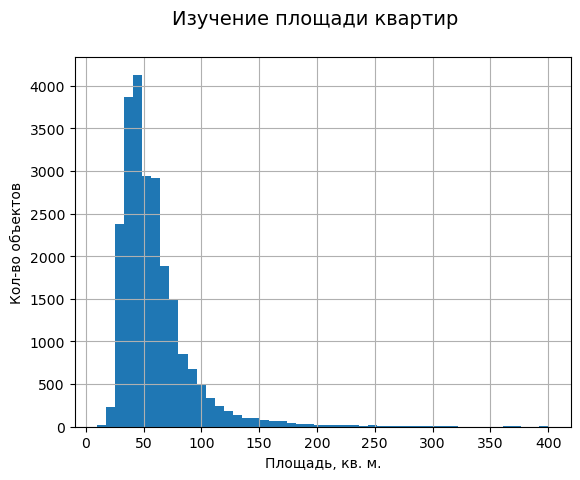

In [30]:
build_hist('total_area', 10, 400)  # строим гистограмму по площади квартир
plt.suptitle('Изучение площади квартир', size=14)
plt.xlabel('Площадь, кв. м.')
plt.ylabel('Кол-во объектов')

Text(0.5, 0.98, 'Диаграмма размаха (площадь квартир)')

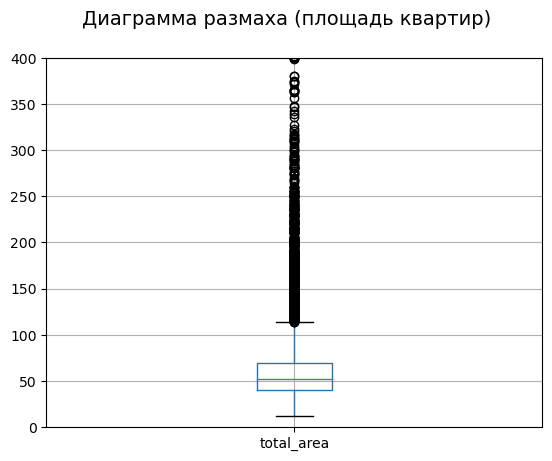

In [31]:
build_boxplot('total_area', 0, 400) # строим диаграмму размаха по площади квартир
plt.suptitle('Диаграмма размаха (площадь квартир)', size=14)

Площадь квартир составляет от 12 до 900 кв. м. Наибольшее количество квартир наблюдается с площадью в диапазоне от ~35 до ~70 кв. м. Пиковое значение количества объектов по гистограмме соответствует квартирам с площадью ~45 кв. м., медиана 52 кв. м. Начиная с отметки с площадью свыше ~100 кв. м., кол-во объектов снижается. Квартиры площадью менее 25 и более 200 кв. метров встречаются крайне редко. Разброс нормальных значений составляет от ~12 кв.м. до 115 кв.м.

Text(0, 0.5, 'Кол-во объектов')

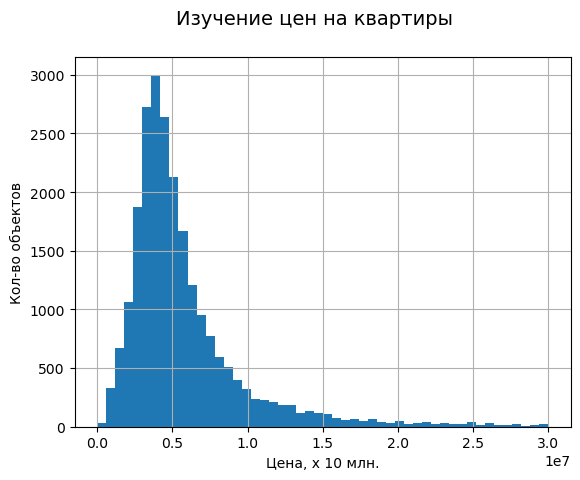

In [32]:
build_hist('last_price', 0, 30000000)  # строим гистограмму по цене
plt.suptitle('Изучение цен на квартиры', size=14)
plt.xlabel('Цена, х 10 млн.')
plt.ylabel('Кол-во объектов')

Text(0.5, 0.98, 'Диаграмма размаха (цена квартир)')

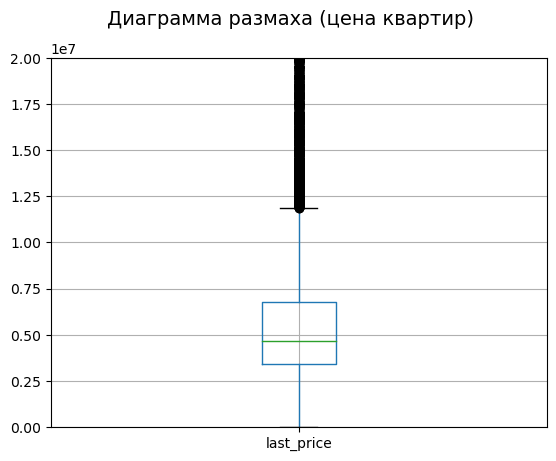

In [33]:
build_boxplot('last_price', 0, 20000000)
plt.suptitle('Диаграмма размаха (цена квартир)', size=14)

Разброс цен на квартиры составляет от 0,012 млн (явно аномальное значение) до 763 млн. Наибольшее количество квартир представлено в ценовом диапазоне от ~3,5 до ~6,5 млн., пиковое значение количества объектов по гистограмме соответствует квартирам в ценовом диапазоне от ~ 4 млн. Медиана 4,6 млн. После отметки ~10млн, кол-во предложений плавно убывает. Разброс нормальных значений составляет от 0 до ~ 12 млн. Поскольку сложно себе представить квартиру (даже в плохом состоянии) в Ленинградской области дешевле 0,3 млн, проверим данные на неочевидные выбросы:

In [34]:
display(df.query('last_price < 300000'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_expos,month_expos,year_expos,floor_category,living_area_ratio,kitchen_area_ratio
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,504.0,8,111.83,2,3,2019,последний,0.29,0.37


И действительно, квартира, площадью 109 кв. м. на 25 этаже не может столько стоить, от этой строки стоит избавиться. Займемся этим в разделе 4.3

Text(0, 0.5, 'Кол-во объектов')

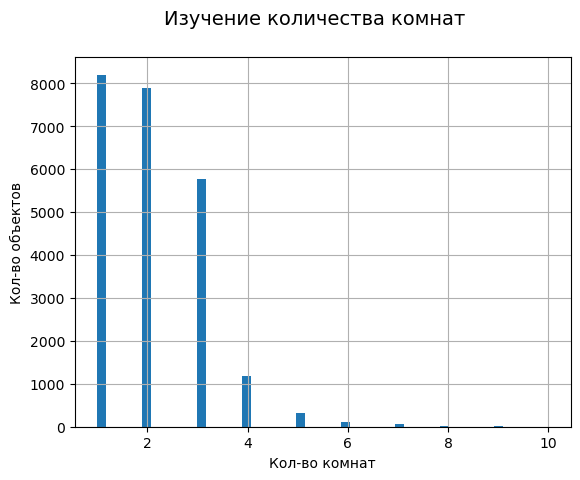

In [35]:
build_hist('rooms', 1, 10)  # строим гистограмму по кол-ву комнат
plt.suptitle('Изучение количества комнат', size=14)
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во объектов')

Text(0.5, 0.98, 'Диаграмма размаха (кол-во комнат)')

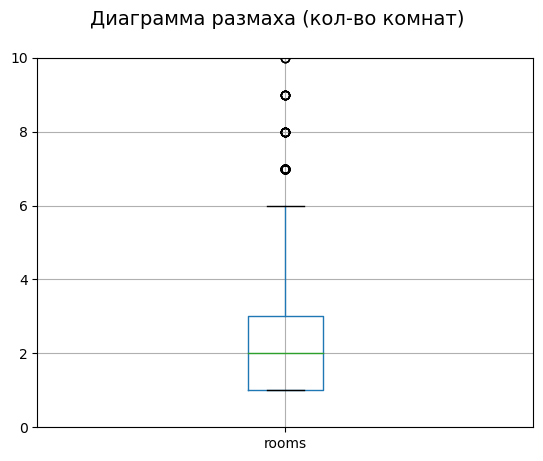

In [36]:
build_boxplot('rooms', 0, 10)  # строим диаграмму размаха по кол-ву комнат
plt.suptitle('Диаграмма размаха (кол-во комнат)', size=14)

Наибольшее число квартир имеют от 1 до 3-х комнат. Больше всего на рынке преставлено однокомнатных квартир. Нормальное значение от 1 до 6 комнат. Среди объявлений о продаже квартир есть варианты от 1 до 19 комнат (что уже больше похоже на индивидуальное строение).

Для коректного построения гистограммы по высоте потолков, для начала определим срез данных. Согласно СНиПов, высота потолков в квартирах может быть от 2,1 м в проходных помещениях и от 2,3 м в жилых. Максимальная высота потолков составляет 4 м. С учетом уже найденых в этом столбце аномалий на этапе знакомства с данными, примем эти ограничения и сделаем срез при построении гистограммы (иначе гистограмма не будет информативной).

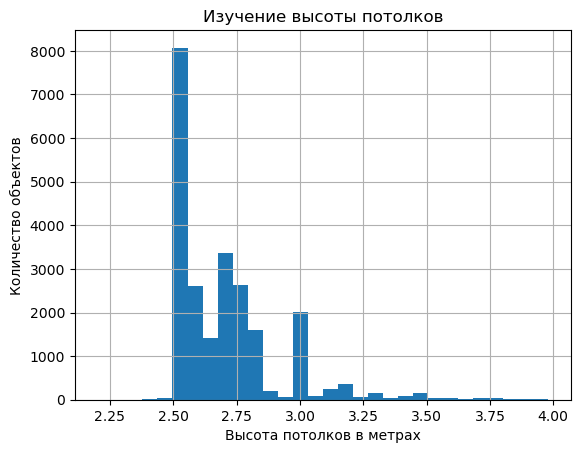

In [37]:
plt.hist(df.query('(ceiling_height > 2.1) & (ceiling_height < 4)')['ceiling_height'], bins=30)  # строим гистограмму по высоте потолков
plt.title('Изучение высоты потолков')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество объектов')
plt.grid()
plt.show()

Text(0.5, 0.98, 'Диаграмма размаха (высота потолков)')

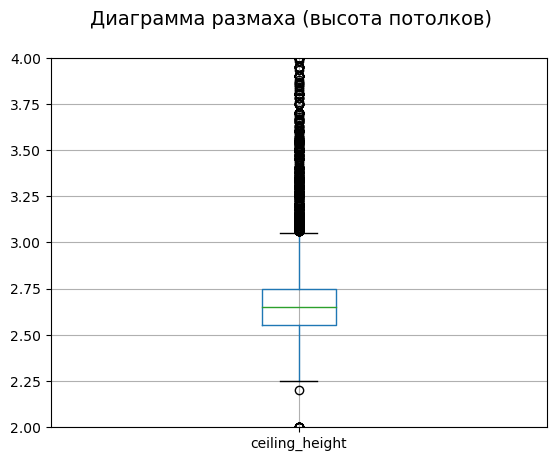

In [38]:
build_boxplot('ceiling_height', 2, 4)  # строим диаграмму размаха по кол-ву комнат
plt.suptitle('Диаграмма размаха (высота потолков)', size=14)

У большей части представленных квартир, высота потолка составляет 2,5; 2,55; 2,6 и 2,7м. Потолки высотой ниже 2,5м и выше 3-х метров встречаются редко. Нормальные значения распределяются от ~2,3 до ~3 м

### 4.2 Изучение времени продаж квартир

Изучим данные столбца **days_exposition**:

In [39]:
df['days_exposition'].describe()

count    23565.000000
mean       185.759728
std        233.492930
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Кол-во объектов')

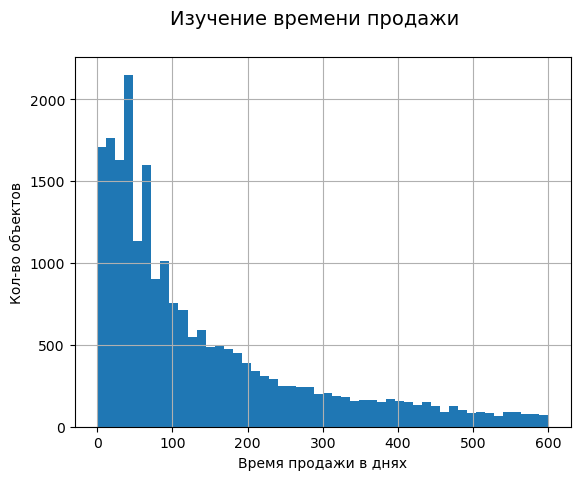

In [40]:
build_hist('days_exposition', 0, 600)  # строим гистограмму по дням продажи
plt.suptitle('Изучение времени продажи', size=14)
plt.xlabel('Время продажи в днях')
plt.ylabel('Кол-во объектов')

Text(0.5, 0.98, 'Диаграмма размаха (время продаж в днях)')

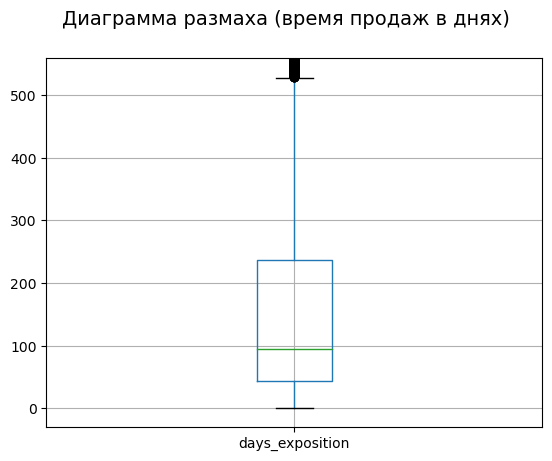

In [41]:
build_boxplot('days_exposition', -30, 560) # строим диаграмму размаха по дням продажи
plt.suptitle('Диаграмма размаха (время продаж в днях)', size=14)

Согласно данным, минимальное время продаж составляет 0 дней, максимальное 1618 дней, среднее значение 186 дней, медиана 94 дня.  При этом, стоит учитывать тот факт, что не все объявления могли сниматься с публикации вовремя. Наличие отдельных пиков на гистограме в районе 40, 60 и 90 дней говорит о том, что в эти дни возможно проводится актуализация объявлений о продаже недвижимости (либо объявления в эти сроки снимаются автоматически по каким-либо еще параметрам). Диаграмма размаха указывает на то, что нормальные значения находятся в диапазоне от 0 до 530 дней. Большее количество квартир продается за период от ~50 до 240 дней. Если квартира продалась менее чем за 50 дней, можно считать продажу быстрой, а если более 240 дней - долго. Необычно долгие сроки продажи уже лежат за диапазоном 530 дней.

### 4.3 Удаление редких и выбивающихся значений

В начале раздела мы установили нормальные значения для столбцов **total_area, last_price, rooms, ceiling_height и days_exposition**, поэтому теперь можем избавиться от выбросов с помощью метода `query()`

In [42]:
df_first = df # сохраним первоначальный датафрейм для контроля
df = df.query('total_area >= 12 and total_area <= 115')  # фильтруем и перезаписываем данные по общей площади
df = df.query('last_price >= 300000 and last_price <= 12000000')  # фильтруем и перезаписываем данные по цене
df = df.query('rooms >= 0 and rooms <= 6') # фильтруем и перезаписываем данные по кол-ву комнат
df = df.query('ceiling_height >= 2.3 and ceiling_height <= 3')  # фильтруем и перезаписываем данные по высоте потолков
df = df.query('days_exposition > 0 and days_exposition <= 530') # фильтруем и перезаписываем данные по дням продаж
df[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe() # контролируем результат

,total_area,last_price,rooms,ceiling_height,days_exposition
count,19063.000000,1.906300e+04,19063.000000,19063.000000,19063.000000
mean,51.755020,4.700362e+06,1.892934,2.652892,124.735141
std,17.204743,2.131754e+06,0.860678,0.138301,122.323432
min,12.000000,4.300000e+05,1.000000,2.300000,1.000000
25%,38.455000,3.283000e+06,1.000000,2.550000,37.000000
50%,48.000000,4.300000e+06,2.000000,2.600000,76.000000
75%,62.000000,5.790000e+06,3.000000,2.750000,177.500000
max,115.000000,1.200000e+07,6.000000,3.000000,530.000000


In [43]:
print('Удалено {}% данных'.format(round((len(df)/len(df_first)-1)*100))) # проверяем количество удаленных данных

Удалено -19% данных


Редкие и выбивающиеся значения удалили, теперь можно наблюдать не только изменение минимальных и максимальных значений, но и уменьшение средних и медианных значений, что вполне ожидаемо, поскольку в выбросы попали редкие объекты недвижимости с большой площадью, высокой стоимостью, большим количеством комнат и большой высотой потолков, а все гистограммы были со смещением вправо. 

### 4.4 Факторы, влияющие на стоимость квартиры

Проверим, зависит ли цена квартиры от ее площади. Построим диаграмму рассеяния:

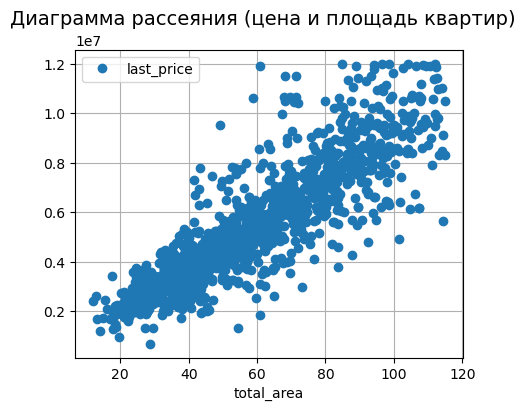

In [44]:
df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 4))
plt.suptitle('Диаграмма рассеяния (цена и площадь квартир)', size=14)
plt.show()

Зависимость между ценой квартиры и ее площадью наблюдается, точное значение вычислим при помощи корелляционной матрицы в разделе 4.7

Проверим зависимость цены от количества комнат:

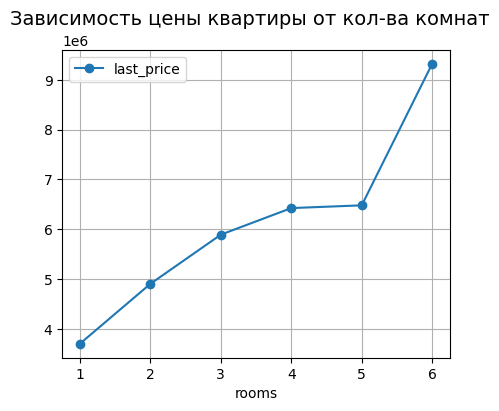

In [45]:
df.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 4))
plt.suptitle('Зависимость цены квартиры от кол-ва комнат', size=14)
plt.show()

Зависимость между ценой и количеством комнат также есть, что не удивительно, поскольку количество комнат увеличивается одновременно с площадью. При этом зависимость несколько снижается при росте числа комнат от 3-х до 5-ти, возможно, с ростом кол-ва комнат на этом отрезке, снижается стоимость квадратного метра, проверим это:

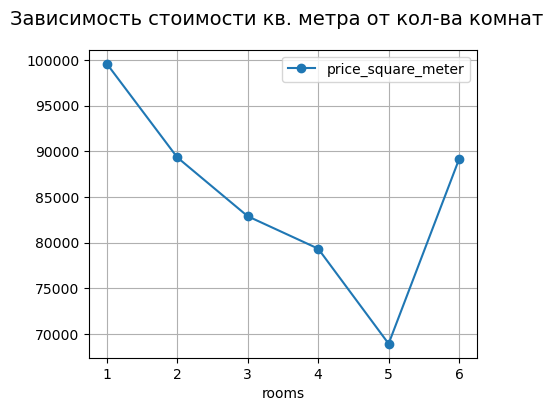

In [46]:
df.pivot_table(index='rooms', values=['price_square_meter']).plot(grid=True, style='o-', figsize=(5, 4))
plt.suptitle('Зависимость стоимости кв. метра от кол-ва комнат', size=14)
plt.show()

Действительно, с ростом кол-ва комнат от 1 до 5, стоимость кв. метра снижается, затем снова начинает расти. Данный рост может быть связан с тем, что квартиры с более чем 5-ю комнатами, попадают уже в сегмент элитной недвижимости.

Перейдем к рассмотрению зависимости цен от близости к центру:

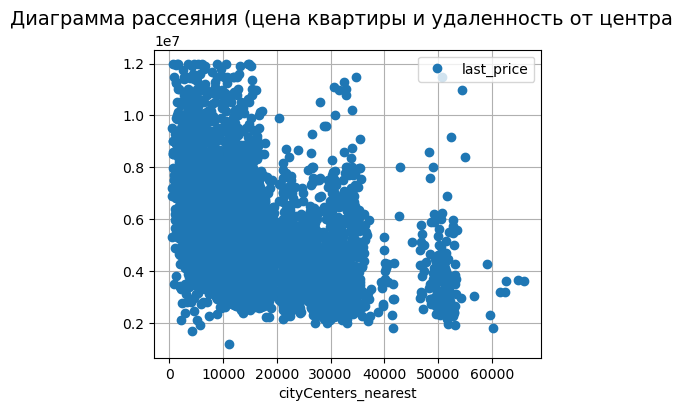

In [47]:
df.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, style='o', figsize=(5, 4))
plt.suptitle('Диаграмма рассеяния (цена квартиры и удаленность от центра', size=14)
plt.show()

Некоторая зависимость наблюдается, хотя и не такая очевидная, видимо другие параметры влияют на цену сильнее. Попробуем попробуем вывести ту же диаграмму, но вместо цены квартиры, будем использовать цену квадратного метра:

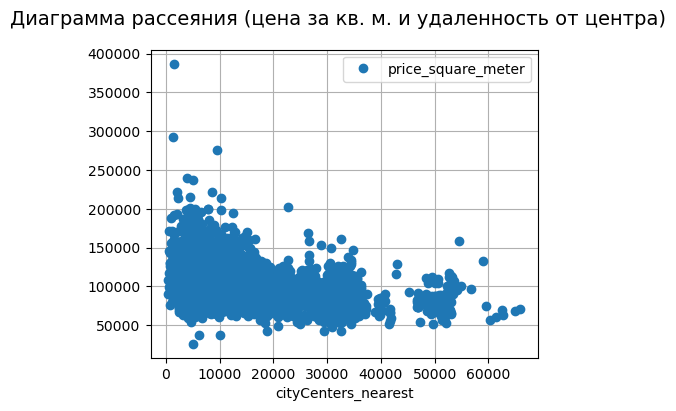

In [48]:
df.pivot_table(index='cityCenters_nearest', values='price_square_meter').plot(grid=True, style='o', figsize=(5, 4))
plt.suptitle('Диаграмма рассеяния (цена за кв. м. и удаленность от центра)', size=14)
plt.show()

Диаграмма приняла более сжатый вид, но зависимость наблюдается примерно на том же уровне. Мы видим некоторую тенденцию к снижению цен, при росте удаленности от центра, но при этом можем наблюдать и недорогие квартиры примерно в 5км от центра. Уточним эту зависимость в следующих разделах.

Проверим влияние категории этажей на цену:

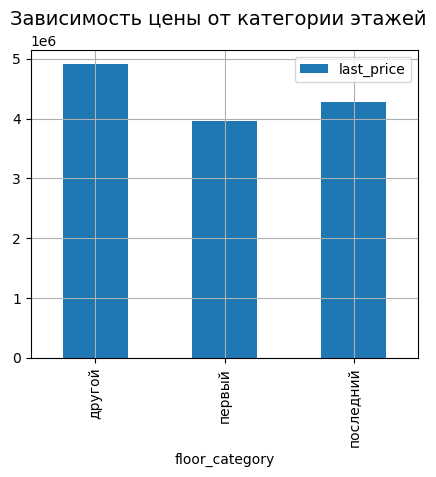

In [49]:
df.pivot_table(index='floor_category', values='last_price').plot(grid=True, style='o-', figsize=(5, 4), kind='bar')
plt.suptitle('Зависимость цены от категории этажей', size=14)
plt.show()

Как и ожидалось, первые и последние этажи большинство покупателей квартир не любят (и особенно первые). Таким образом, корреляция установлена. Самые дорогие квартиры на "другом этаже".

Теперь рассмотрим зависимость цен от дня недели размещения объявления о продаже:

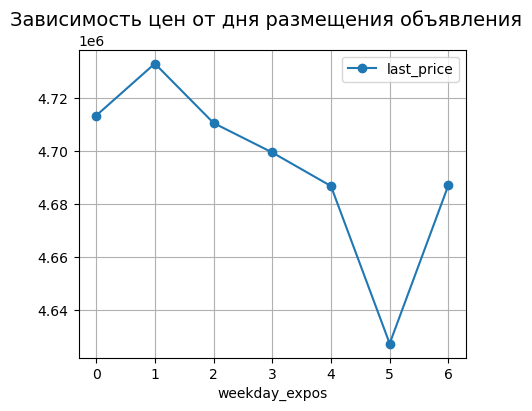

In [50]:
df.pivot_table(index='weekday_expos', values='last_price').plot(grid=True, style='o-', figsize=(5, 4))
plt.suptitle('Зависимость цен от дня размещения объявления', size=14)
plt.show()

На этом графике мы можем наблюдать плавное снижение цен со вторника по пятницу, и почти ~1% снижение в субботу, в воскресенье же цена снова начинает восстанавливаться. Значительное снижение цен в субботу, возможно происходит из-за активности риэлторов в субботу, когда в сети стараются привлечь в выходные дни покупателей дополнительными скидками, и в момент публикации объявления, продавец, ориентируясь на эти цены, также ставит цену ниже. Суббота, таким образом, является наиболее благоприятным днем для принятия решения о приобретении нидвижимости.

Проверим зависимость цен от месяца размещения объявления о проджаже:

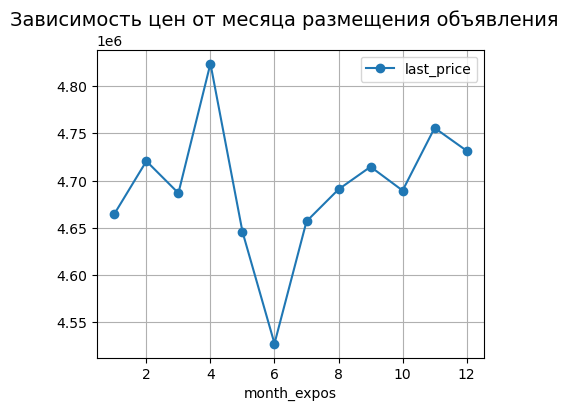

In [51]:
df.pivot_table(index='month_expos', values='last_price').plot(grid=True, style='o-', figsize=(5, 4))
plt.suptitle('Зависимость цен от месяца размещения объявления', size=14)
plt.show()

Самые высокие цены в апреле и ноябре, самые низкие в июне. Аналогичные сезонные пики активности можно наблюдать практически во всех сегментах торговли. Весной и осенью идет рост продаж и рост цен, к январю-февралю активность покупателей падает и цены тоже снижаются. Резкое снижение цен в мае - июне, видимо связано с отсутствием интереса у покупателей в связи с планированием отпусков.

Теперь посмотрим данные по годам:

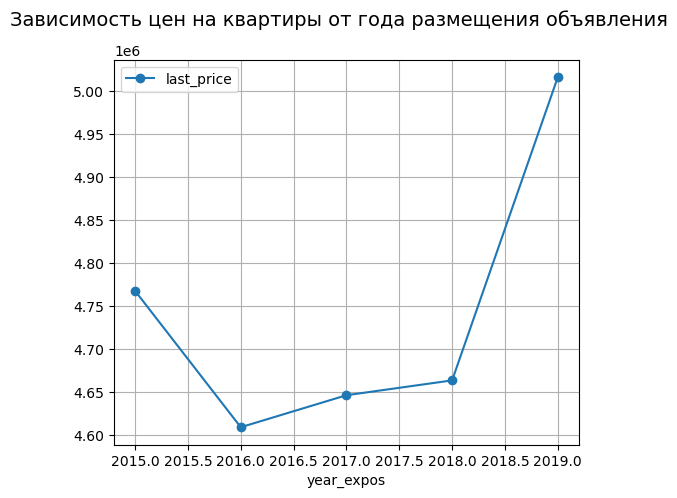

In [52]:
df.pivot_table(index='year_expos', values='last_price').plot(grid=True, style='o-', figsize=(6, 5))
plt.suptitle('Зависимость цен на квартиры от года размещения объявления', size=14)
plt.show()

Здесь виден тренд на ежегодный прирост, но с 2015 до 2016 года наблюдается некоторое снижение. Проверим, не менялись ли за этот период данные по площади квартир, ведь они могут оказывать ощутимое влияние на цену объекта недвижимости:  

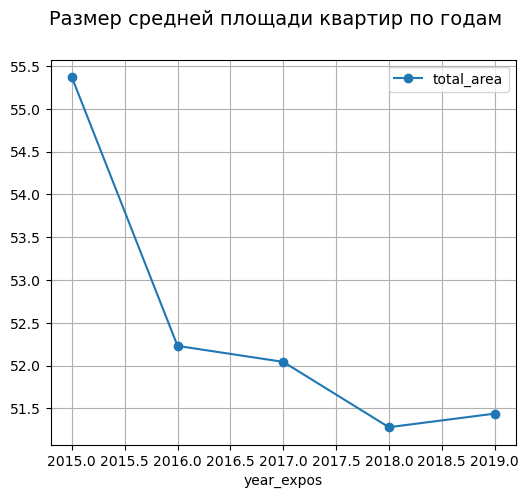

In [53]:
df.pivot_table(index='year_expos', values='total_area').plot(grid=True, style='o-', figsize=(6, 5))
plt.suptitle('Размер средней площади квартир по годам', size=14)
plt.show()

Да, такое влияние есть, средняя площадь продаваемых квартир активно снижалась с 2015 по 2016 - на ~ 3 кв.м., и с 2016 по 2018 - еще на ~1 кв.м. Вероятнее всего это связано со снижением спроса на крупные и дорогие объекты недвижимости, в связи со снижением покупательной способности населения.

Проверим, что происходит с ценой за квадратный метр за аналогичный период:

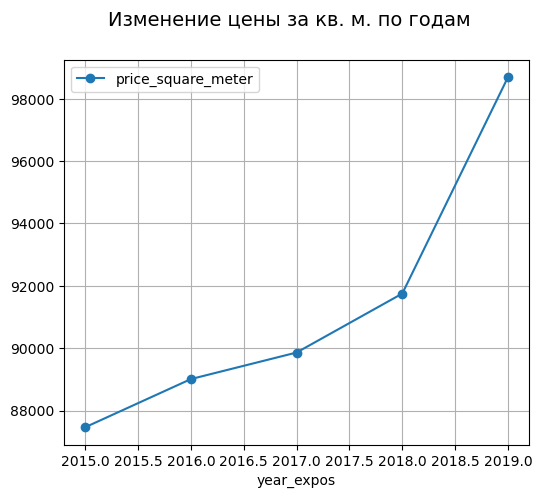

In [54]:
df.pivot_table(index='year_expos', values='price_square_meter').plot(grid=True, style='o-', figsize=(6, 5))
plt.suptitle('Изменение цены за кв. м. по годам', size=14)
plt.show()

А здесь мы четко можем наблюдать, что цены растут от года к году. Основной фактор влияния - инфляция, в качестве дополнительных - государственные программы по улучшению условий ипотечных займов. В 2018 году рост цен ускорился, одновременно с ростом курса валют.

**Итог:** 
Удалось обнаружить положительную корреляцию между ценой квартиры и ее площадью, а также между ценой и количеством комнат. При росте числа комнат от 3-х до 5-ти, зависимость несколько снижается, затем снова начинает расти.  
Стоимость квадратного метра имеет отрицательную корреляцию, т.е. снижается с ростом кол-ва комнат от 1 до 5, затем также начинает расти. Предполагаем, что квартиры с более чем 5-ю комнатами, попадают уже в сегмент элитной недвижимости.  
Зависимость цен от удаленности от центра не так очевидна, уточним этот вопрос в следующих разделах. 
Вполне ожидаемо, что первые и последние этажи большинство покупателей квартир не любят (и особенно первые). Таким образом, зависимость цен от категории этажа подтверждается. Самые дорогие квартиры на "другом этаже".  
Наблюдается определенная зависимость цен от времени размещения объявления. Относительно дней недели, наблюдается снижение цен к выходным дням. В течение года, наблюдается ярко выраженная сезонность - в начале весны и осени подъем цен, а в начале лета и в середине зимы наблюдается спад. Самые высокие цены в апреле и ноябре, самые низкие в июне. 
Также, мы видим ежегодный прирост цен.


### 4.5 Стоимость квадратного метра жилья в населенных пунктах с наибольшим числом объявлений

Выберем 10 населенных пунктов с наибольшим количеством объявлений, затем сгруппируем по населенным пунктам данные по средней стоимости квадратного метра, и выведем результат, отсортированный в порядке убывания:

In [55]:
ten_localities = df['locality_name'].value_counts().head(10)  # выбираем 10 населенных пунктов с наибольшим кол-вом объявлений
localities_price = df.query(
    'locality_name in (@ten_localities.index)').pivot_table(
    values='price_square_meter', index='locality_name') # группируем среднюю стоимость кв. метра по выбранным населенным пунктам
localities_price = localities_price.astype(int)  # приводим к целочисленному значению для удобства восприятия данных
localities_price.sort_values('price_square_meter', ascending=False)  # выводим результат, отсортированный по убыванию

,price_square_meter
locality_name,
Санкт-Петербург,105413
Пушкин,99833
деревня Кудрово,92615
поселок Парголово,90045
поселок Мурино,85769
поселок Шушары,78478
Колпино,75189
Гатчина,68736
Всеволожск,66978


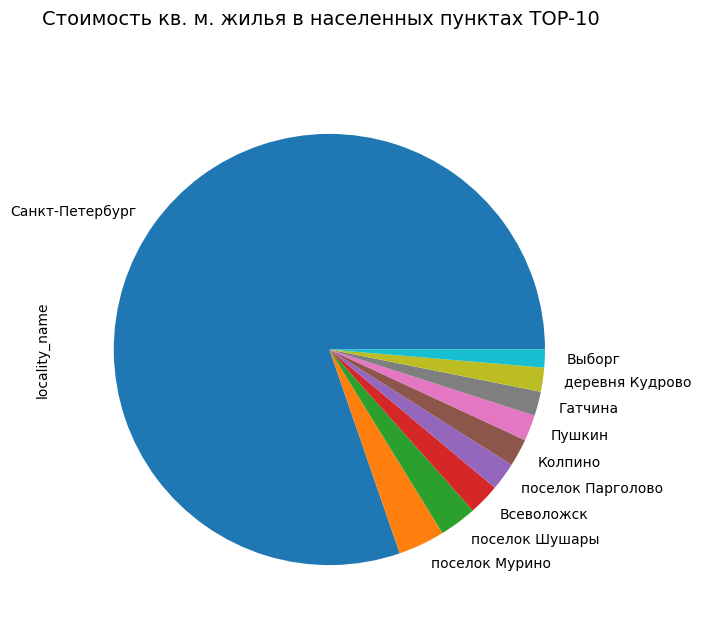

In [56]:
ten_localities.plot(y='count', kind='pie', figsize=(7, 7)) # визуализируем полученные данные
plt.suptitle('Стоимость кв. м. жилья в населенных пунктах TOP-10', size=14)
plt.show()

После отбора десяти населенных пунктов с наибольшим количеством объявлений, самая высокая стоимость квадратного метра жилья оказалась в Санкт-Петербурге, самая низкая - в Выборге.

### 4.6 Зависимость цены от удаленности от центра

Для начала добавим новый столбец, где будет указано расстояние до центра в километрах, затем построим график и определим границу центральной зоны:

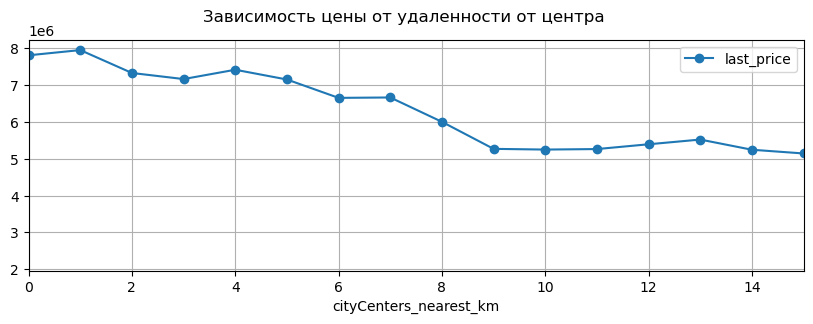

In [57]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000  # добавляем столбец с расстоянием до центра в км
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(value=0).astype(int)  # округляем до целочисленного значения
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    df.query('locality_name == "Санкт-Петербург"')  # отбираем значения по Санкт-Петербургу
    .pivot_table(index='cityCenters_nearest_km', values='last_price')  # группируем ср/ цену за кв. м. по удаленности от центра
    .plot(grid=True, style='o-', xlim=(0, 15), figsize=(10, 3))  # строим график
)
plt.suptitle('Зависимость цены от удаленности от центра')
plt.show()

На основе графика, делаем вывод, что центральной частью Санкт-Петербурга можно считать 7-ми километровую зону. Начиная с этой отметки, цена за квадратный метр площади резко снижается.

### 4.7 Изучение сегмента квартир в центре 

Создадим новый датафрейм centere_df, куда войдут все наши данные по объектам недвижимости, с удаленностью от центра не более 7км:

In [58]:
center_df = df.query('cityCenters_nearest_km <= 7')

Теперь изучим интересующие нас параметры: площадь, цена, число комнат и высота потолков:

In [59]:
def build_hist_center(column, xmin, xmax):  # создаем еще одну функццю для построения гистограмм
    center_df[column].hist(bins=50, range=(xmin, xmax))

Сравним параметры площади квартир в центре и в общей выборке:

Text(0, 0.5, 'Кол-во объектов')

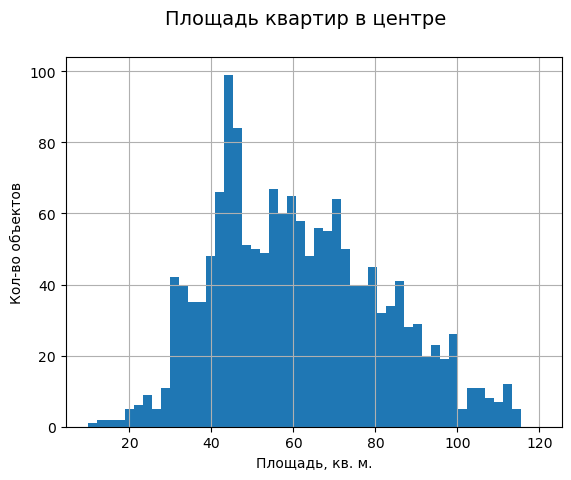

In [60]:
build_hist_center('total_area', 10, 120)  # гистограмма площади квартир в центре
plt.suptitle('Площадь квартир в центре', size=14)
plt.xlabel('Площадь, кв. м.')
plt.ylabel('Кол-во объектов')

Text(0, 0.5, 'Кол-во объектов')

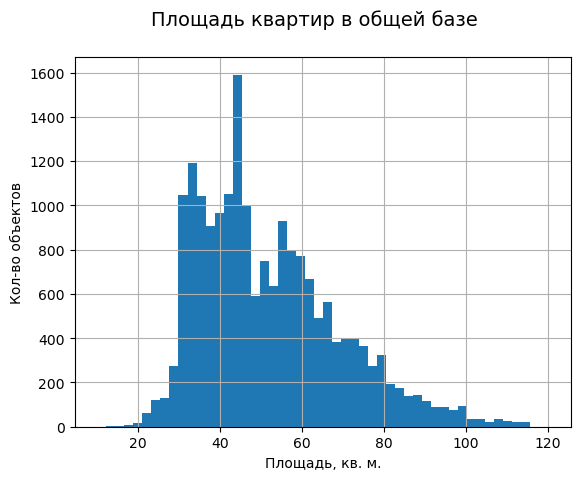

In [61]:
build_hist('total_area', 10, 120)  # гистограмма площади квартир в общей базе
plt.suptitle('Площадь квартир в общей базе', size=14)
plt.xlabel('Площадь, кв. м.')
plt.ylabel('Кол-во объектов')

In [62]:
print('Среднее значение площади квартиры в центре:', round(
    center_df['total_area'].mean()), 'кв.м.', '    (на {} % больше)'.format(round(
    (center_df['total_area'].mean() / df['total_area'].mean() -1) * 100, 1)))
print('Среднее значение площади квартиры в общей базе:', round(df['total_area'].mean()), 'кв.м.')
print()
print('Медианное значение площади квартиры в центре:', round(
    center_df['total_area'].median()), 'кв.м.', '  (на {} % больше)'.format(round(
    (center_df['total_area'].median() / df['total_area'].median() -1) * 100, 1)))
print('Медианное значение площади квартиры в общей базе:', round(df['total_area'].median()), 'кв.м.')

Среднее значение площади квартиры в центре: 61 кв.м.     (на 18.7 % больше)
Среднее значение площади квартиры в общей базе: 52 кв.м.

Медианное значение площади квартиры в центре: 60 кв.м.   (на 25.0 % больше)
Медианное значение площади квартиры в общей базе: 48 кв.м.


Среднее и медианное значение площади квартиры в центре, выше аналогичного значения в общей базе данных на 18,7 % и 25 % соответственно.

Сравним цены на квартиры в центре и в общей выборке:

Text(0, 0.5, 'Кол-во объектов')

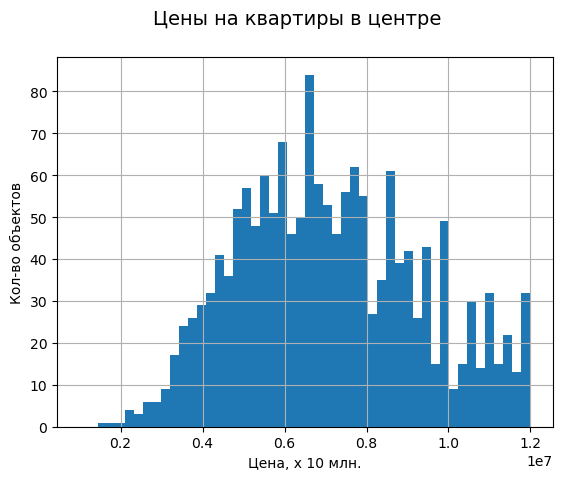

In [63]:
build_hist_center('last_price', 1000000, 12000000)  # гистограмма цен на квартиры в центре
plt.suptitle('Цены на квартиры в центре', size=14)
plt.xlabel('Цена, х 10 млн.')
plt.ylabel('Кол-во объектов')

Text(0, 0.5, 'Кол-во объектов')

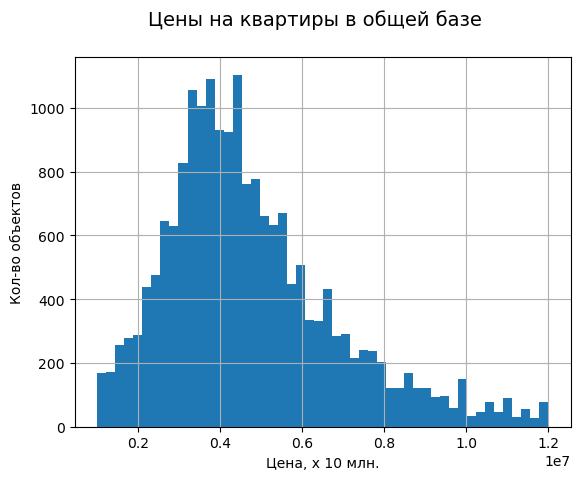

In [64]:
build_hist('last_price', 1000000, 12000000)  # гистограмма цен на квартиры в общей базе
plt.suptitle('Цены на квартиры в общей базе', size=14)
plt.xlabel('Цена, х 10 млн.')
plt.ylabel('Кол-во объектов')

In [65]:
print('Среднее значение цены квартиры в центре:', round(
    center_df['last_price'].mean() / 1000000, 1), 'млн.' '    (на {} % больше)'.format(round(
    (center_df['last_price'].mean() / df['last_price'].mean() -1) * 100, 1)))
print('Среднее значение цены квартиры в общей базе:', round(df['last_price'].mean() / 1000000, 1), 'млн.')
print()
print('Медианное значение цены квартиры в центре:', round(
    center_df['last_price'].median() /1000000, 1), 'млн.', ' (на {} % больше)'.format(round(
    (center_df['last_price'].median() / df['last_price'].median() -1) * 100, 1)))
print('Медианное значение цены квартиры в общей базе:', round(df['last_price'].median() / 1000000, 1))

Среднее значение цены квартиры в центре: 7.1 млн.    (на 51.3 % больше)
Среднее значение цены квартиры в общей базе: 4.7 млн.

Медианное значение цены квартиры в центре: 6.9 млн.  (на 60.5 % больше)
Медианное значение цены квартиры в общей базе: 4.3


Среднее и медианное значение цен на квартиры в центральном сегменте, более, чем в 1,5 раза выше значений в общей базе. Отличаются и пиковые значения гистограмм - в ценре оно находится на отметке ~6.5 млн., в общей базе на уровне ~4.5 млн.

Перейдем к сравнению кол-ва комнат в квартирах центрального сегмента и общей базы:

Text(0, 0.5, 'Кол-во объектов')

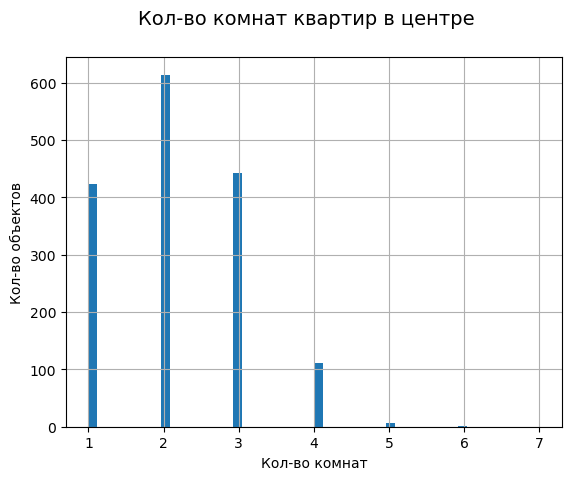

In [66]:
build_hist_center('rooms', 1, 7)  # гистограмма кол-ва комнат в квартирах центрального сегмента
plt.suptitle('Кол-во комнат квартир в центре', size=14)
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во объектов')

Text(0, 0.5, 'Кол-во объектов')

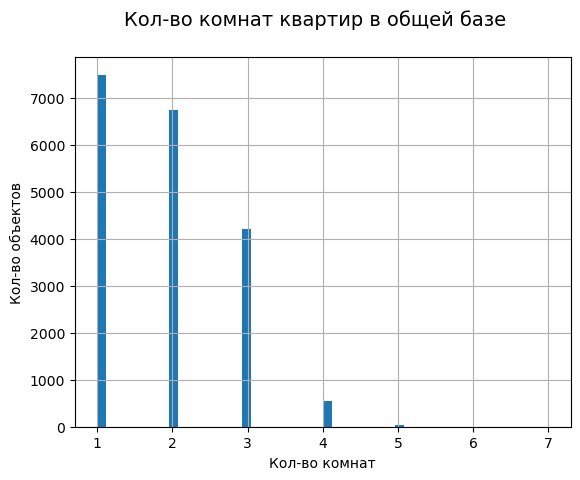

In [67]:
build_hist('rooms', 1, 7)  # гистограмма кол-ва комнат в квартирах общей базы
plt.suptitle('Кол-во комнат квартир в общей базе', size=14)
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во объектов')

In [68]:
print('Среднее значение кол-ва комнат квартир в центре:', round(
    center_df['rooms'].mean(), 1), '     (на {} % больше)'.format(round(
    (center_df['rooms'].mean() / df['rooms'].mean() -1) * 100, 1)))
print('Среднее значение кол-ва комнат квартир в общей базе:', round(df['rooms'].mean(), 1))
print()
print('Медианное значение кол-ва комнат квартир в центре:', round(center_df['rooms'].median(), 1))
print('Медианное значение кол-ва комнат квартир в общей базе:', round(df['rooms'].median(), 1))

Среднее значение кол-ва комнат квартир в центре: 2.2      (на 14.6 % больше)
Среднее значение кол-ва комнат квартир в общей базе: 1.9

Медианное значение кол-ва комнат квартир в центре: 2.0
Медианное значение кол-ва комнат квартир в общей базе: 2.0


В центральной части преобладают квартиры с двумя и тремя комнатами, тогда как в общй выборке данных больше всего однокомнатных и двухкомнатных квартир. Среднее значение кол-ва комнат квартир в центре, на 4,6 % выше среднего значения в общей базе, а медианы равны. Это говорит о том, что в центральной части, квартир с кол-вом комнат выше медианного значения, удельно также больше чем в картирах из общей базы. Этот факт мы наблюдаем и на гистограмме.

Теперь проверим, есть ли отличия в высоте потолков:

Text(0, 0.5, 'Кол-во объектов')

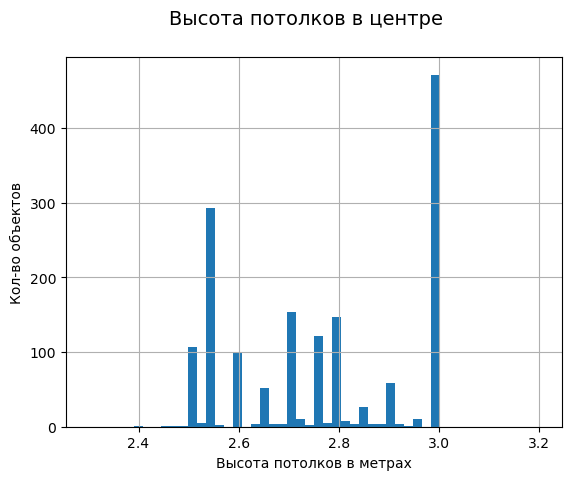

In [69]:
build_hist_center('ceiling_height', 2.3, 3.2)  # гистограмма высоты потолков в квартирах центрального сегмента
plt.suptitle('Высота потолков в центре', size=14)
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Кол-во объектов')

Text(0, 0.5, 'Кол-во объектов')

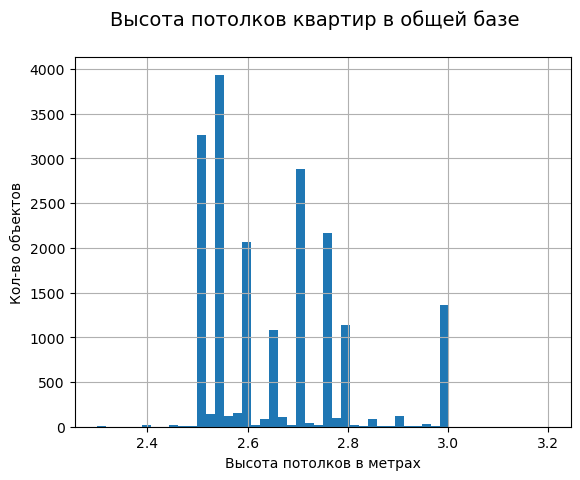

In [70]:
build_hist('ceiling_height', 2.3, 3.2)  # гистограмма высоты потолков в общей базе квартир
plt.suptitle('Высота потолков квартир в общей базе', size=14)
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Кол-во объектов')

In [71]:
print('Среднее значение высоты потолков квартир в центре:', round(
    center_df['ceiling_height'].mean(), 1), 'м.', '     (на {} % больше)'.format(round(
    (center_df['ceiling_height'].mean() / df['ceiling_height'].mean() -1) * 100, 1)))
print('Среднее значение высоты потолков квартир в общей базе:', round(df['ceiling_height'].mean(), 1), 'м.')
print()
print('Медианное значение высоты потолков квартир в центре:', round(
    center_df['ceiling_height'].median(), 1), 'м.', '     (на {} % больше)'.format(
    round((center_df['ceiling_height'].median() / df['ceiling_height'].median() -1) * 100, 1)))
print('Медианное значение высоты потолков квартир в общей базе:', round(df['ceiling_height'].median(), 1), 'м.')

Среднее значение высоты потолков квартир в центре: 2.8 м.      (на 4.2 % больше)
Среднее значение высоты потолков квартир в общей базе: 2.7 м.

Медианное значение высоты потолков квартир в центре: 2.8 м.      (на 5.8 % больше)
Медианное значение высоты потолков квартир в общей базе: 2.6 м.


Самая распространнная высота потолков квартир в центре имеет величину 3 метра, тогда как в общей базе данных преобладают квартиры с высотой потолков 2,55 метров. Медианное значение высоты потолков в центре выше на 5,8 %, а средняя величина на 4,2 %.

Теперь перейдем к изучению влияния на стоимость квартиры различных параметров. Для параметров с линейной корреляцией построим графики Pair plot и выведем heatmap с коэффициентами корреляции:

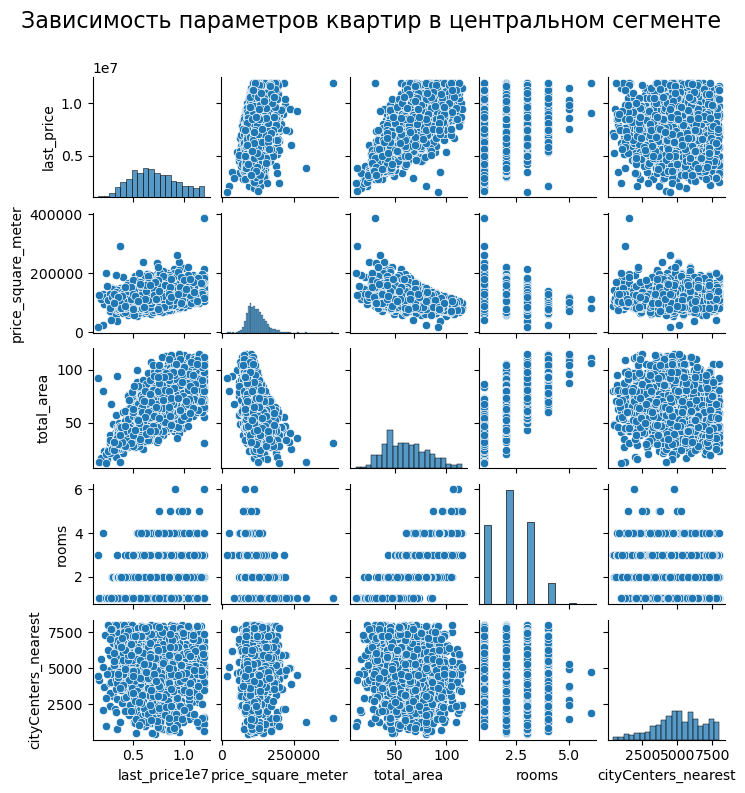

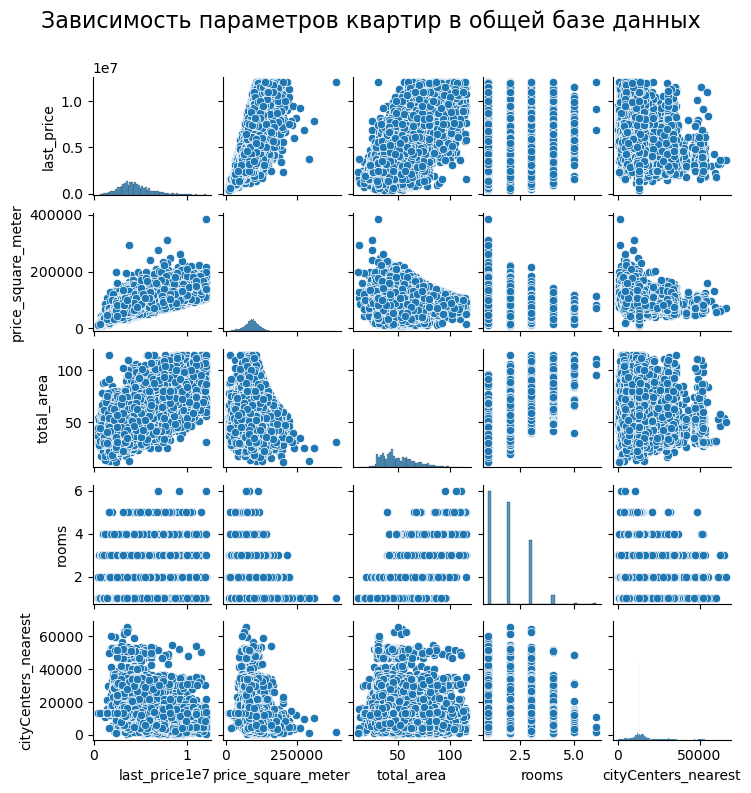

In [72]:
sns.pairplot(center_df, vars=['last_price', 'price_square_meter', 'total_area', 'rooms', 'cityCenters_nearest'], height=1.5)
plt.suptitle('Зависимость параметров квартир в центральном сегменте', size=16, y=1.05)
sns.pairplot(df, vars=['last_price', 'price_square_meter', 'total_area', 'rooms', 'cityCenters_nearest'], height=1.5)
plt.suptitle('Зависимость параметров квартир в общей базе данных', size=16, y=1.05)
plt.show()

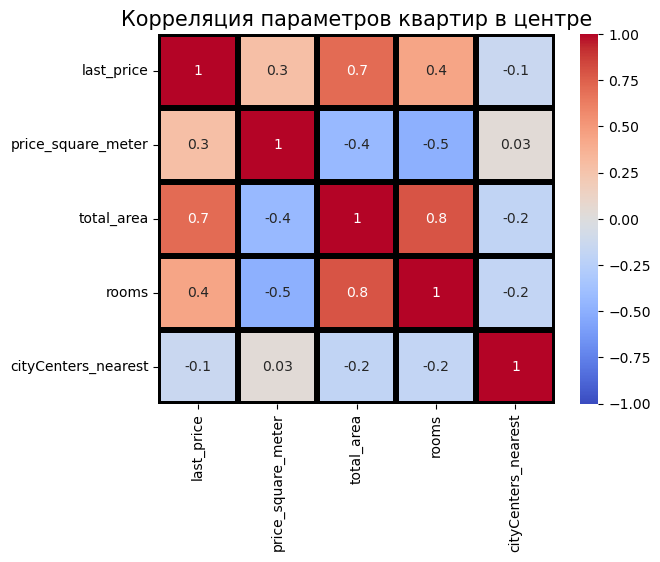

In [73]:
sns.heatmap(center_df[['last_price', 'price_square_meter', 'total_area', 'rooms', 'cityCenters_nearest']].corr(),
            annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black', fmt='.1g')
plt.title('Корреляция параметров квартир в центре', fontsize = 15)
plt.show()

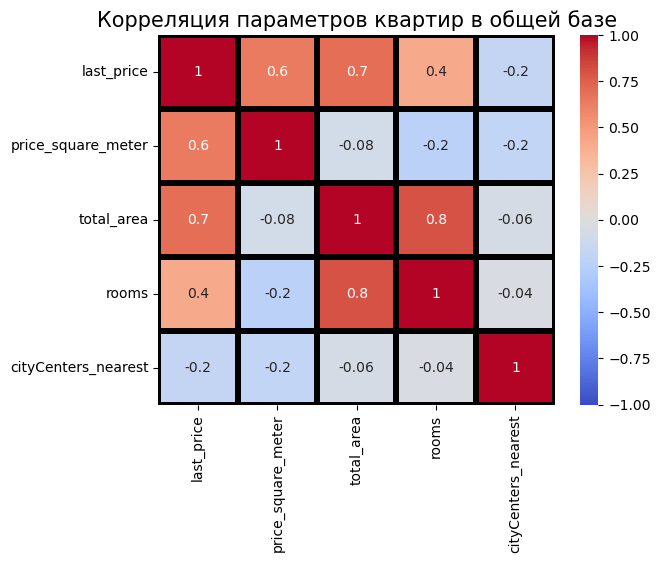

In [74]:
sns.heatmap(df[['last_price', 'price_square_meter', 'total_area', 'rooms', 'cityCenters_nearest']].corr(),
            annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black', fmt='.1g')
plt.title('Корреляция параметров квартир в общей базе', fontsize = 15)
plt.show()

При изучении и сравнении данных параметров, обнаружено следующее влияние на стоимость квартиры: 

**Цена квадратного метра** имеет умеренную положительную корреляцию в общей базе квартир, а в центральном сегменте - слабую.

**Площадь квартиры** достаточно сильно влияет на стоимость квартиры, как в общей базе, так и в центре. Коэффициент корреляции, среди рассматриваемых параметров является самым высоким.

**Кол-во комнат** имеет одинаковую положительную корреляцию в обоих рассматриваемых сегментах, на уровне 0,4.

**Близость к центру**  - на основе полученных числовых значений, в обоих рассматриваемых сегментах корреляция не установлена. Для общей базы квартир получили отрицательное значение на уровне -0,2, а в центральном сегменте - на уровне -0,1.  
При этом на коротком отрезке графика (от 7 до 9км от центра), мы наблюдали значимое снижение цен на квартиры. Также, опираясь на данные по стоимости квадратного метра в населенных пунктах с наибольшим количеством объявлений, с заметным отрывом лидировал Санкт-Петербург. Следовательно, мы можем наблюдать снижение цен на границе Санкт-Петербурга и Лениградской области. Проверим с помощью графика:  

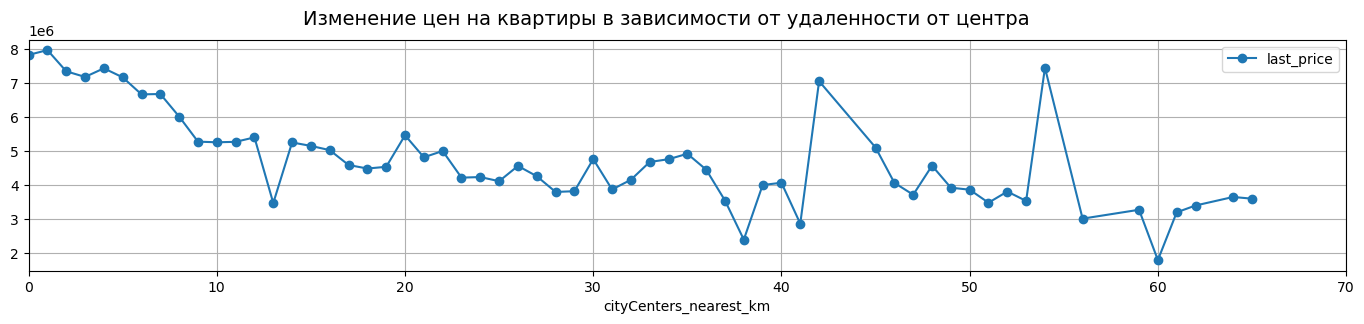

In [75]:
df.pivot_table(index='cityCenters_nearest_km', values='last_price').plot(grid=True, style='o-', xlim=(0, 70), figsize=(17, 3))
plt.suptitle('Изменение цен на квартиры в зависимости от удаленности от центра', size=14)
plt.show()

Действительно, на границе 35км зоны мы наблюдаем снижение цен. Далее на графике заметны отдельные всплески, которые вероятнее всего отражают крупные элитные объекты недвижимости.

Для параметров без линейной зависимости составим обычные графики:

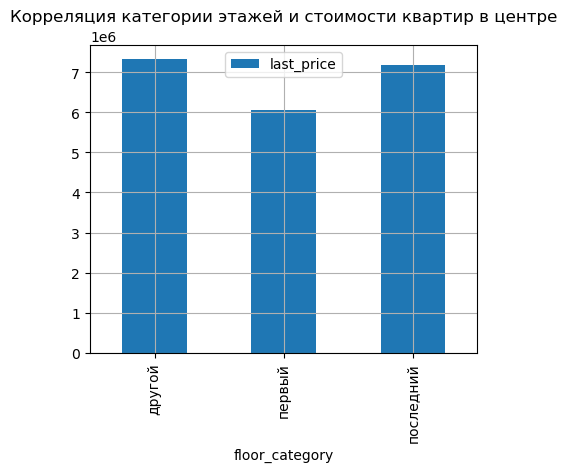

In [76]:
center_df.pivot_table(index='floor_category', values='last_price').plot(grid=True, style='o-', figsize=(5, 4), kind='bar')
plt.title('Корреляция категории этажей и стоимости квартир в центре', fontsize = 12, y=1.05)
plt.show()

На этом графике обнаружено существенное отличие центрального сегмента по отношению к общей выборке: последние этажи здесь почти также ценятся, как и другие. Вероятнее всего, это связано с практикой размещения в дорогостоящих районах элитных пентхаусов на верхних этажах зданий, а также программой реконструкции домов, когда на последних этажах старых зданий, при сохранении исторической архитектуры, достраивают современные и соответственно дорогостоящие жилые площади.
По отношению к первому этажу, среди сегментов выборки различий не наблюдается, такие квартиры ценятся существенно ниже.

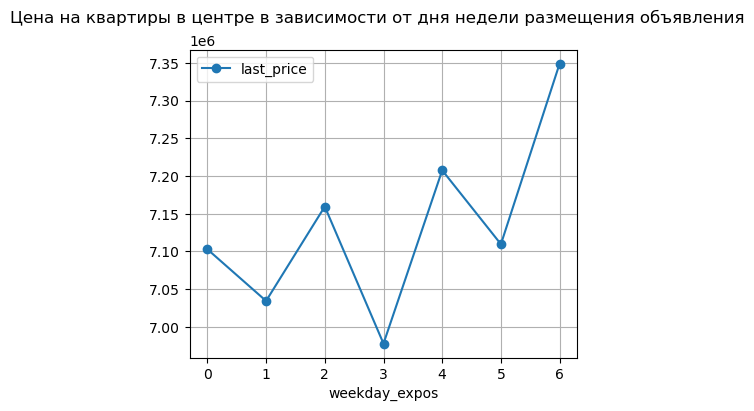

In [77]:
center_df.pivot_table(index='weekday_expos', values='last_price').plot(grid=True, style='o-', figsize=(5, 4))
plt.suptitle('Цена на квартиры в центре в зависимости от дня недели размещения объявления', size=12)
plt.show() # строим график зависимости цен на квартиры от дня недели размещения объявления

График зависимости цен от дня недели размещения объявления для квартир в центре, отличается от аналогичного графика для всей выборки. Самые низкие цены можно увидеть в четверг, а в целом, мы здесь наблюдаем тенденцию роста цен к выходным, что может говорить о том, что объектов в центральной части значительно меньше, и здесь складываетя ситуация, когда к выходным множество покупателей контактирует с ограниченным количеством продавцов, что подталкивает цены вверх.

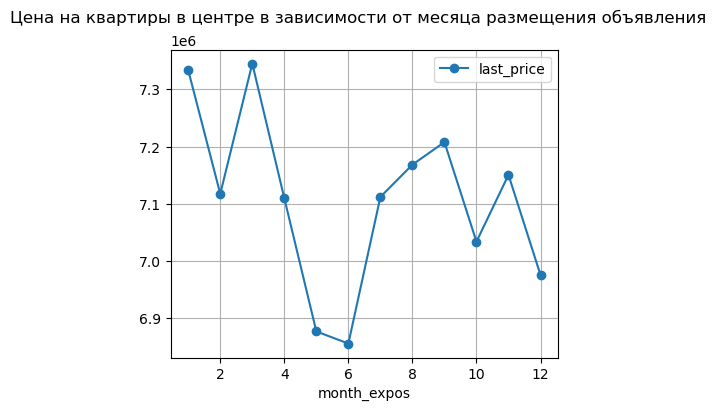

In [78]:
center_df.pivot_table(index='month_expos', values='last_price').plot(grid=True, style='o-', figsize=(5, 4))
plt.suptitle('Цена на квартиры в центре в зависимости от месяца размещения объявления', size=12)
plt.show() # строим график зависимости цен на квартиры от месяца размещения объявления

Данный график похож на аналогичный график из общей выборки, также имеет ярко выраженную сезонность, но отличается более ранним снижением цен в декабре и повышением в январе. Возможно, здесь мы наблюдаем такую же картину, когда потенциальные покупатели, при ограниченном предложении объектов в центре, проявляют активность в выходные дни (в январе много праздничных дней), чем немного разгоняют цены.

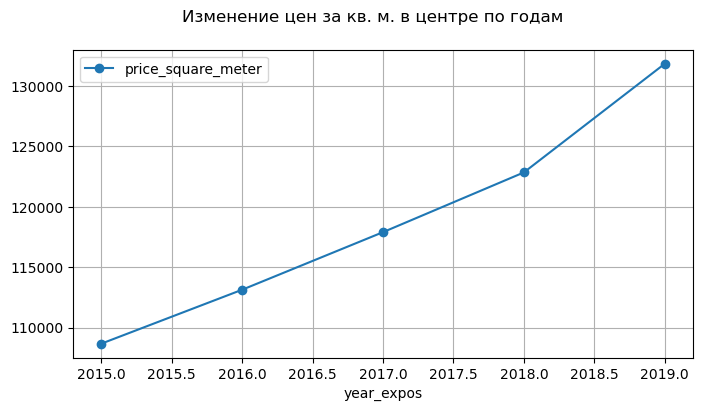

In [80]:
center_df.pivot_table(index='year_expos', values='price_square_meter').plot(grid=True, style='o-', figsize=(8, 4))
plt.suptitle('Изменение цен за кв. м. в центре по годам', size=12)
plt.show() # строим график зависимости цен на квартиры от года размещения объявления

График роста цен от года к году в центральной части не особо отличается от графика из общей выборки, здесь мы также наблюдаем постоянный рост.

### 4.8 Вывод

1. Исследование показало, что на рынке Санкт-Петербурга и соседних областей преобладают квартиры с площадью в диапазоне от ~35 до ~70 кв. м., при этом в центральной, 7-ми километровой зоне, среднее и медианное значение площади квартир в ~1,2 раза выше. Редкими значениями можно считать все, находящиеся за пределами от 12 до 115м.
2. Наибольшее количество квартир представлено в ценовом диапазоне от ~3,5 до ~6,5 млн, при этом в центральном сегменте, среднее и медианное значение, более, чем в 1,5 раза выше. Редкими значениями можно считать все, находящиеся в диапазоне от ~300тыс до 12 млн.
3. В представленной базе данных, наибольшее число квартир имеют от 1 до 3-х комнат, в общей выборке преобладают однокомнатные, для центральной части характерно преобладание двухкомнатных квартир. Редкими можно считать квартиры с 6-ю и более комнатами.
4. Самая распространнная высота потолков квартир в центре имеет величину 3 метра, в общей базе объявлений преобладают квартиры с высотой потолков 2,55 м. Потолки высотой более 3м, а также высотой ниже 2,5м встречаются редко.
5. Основная масса квартир продается за период от ~50 до 240 дней, медианное значение - 94 дня. Если квартира продалась, менее, чем за 50 дней, можно считать продажу быстрой, а если более 240 дней - долго. Квартира, продающаяся более 530 дней - редкость.
6. На стоимость квартиры больше всего влияет ее площадь и количество комнат. При этом, при увеличении кол-ва комнат от 1-ой до 5-ти, стоимость квадратного метра снижается, затем снова начинает расти. Цена квадратного метра имеет умеренную положительную корреляцию в общей выборке квартир, а в центральном сегменте - слабую.  
Близость расположения квартиры к центру, на определенных отрезках расстояний, имеет влияние на цену квартир, к примеру - цена на квартиры заметно снижается на удалении от 7 до 9 километров от центра, а стоимость квадратного метра в Санкт-Петербурге почти в два раза выше стоимости кв. м. в Выборге. При этом, в рассмотренных выборках корреляция цены и удаленности от центра не установлена, поскольку другие параметры оказывают на цену более значимое влияние.  
Серьезное влияние на цену, также, оказывает категория этажа: самые ценные квартиры - все, кроме первого и последнего этажа, во вторую очередь котируются квартиры на последних этажах, причем в центральной части их стоимость лишь не намного ниже, наименее ценные квартиры традиционно находятся на первых этажах.  
Наблюдается определенная зависимость цен от времени размещения объявления. Если брать дни недели, для центрального сегмента характерно небольшое увеличение цены к выходным, а для общей выборки - напротив, наблюдается снижение. В течение года, наблюдается ярко выраженная сезонность - в начале весны и осени подъем цен, а в начале лета и в середине зимы наблюдается спад. Самые привлекательные цены для покупателей - в июне, а для для продавцов  - в марте-апреле. При этом с каждым годом цены становятся выше.

## 5 Общий вывод

В рамках данного проекта, были обнаружены проблемы в данных - наличие большого количества пропусков, имелись неточности в типах данных, а также аномальные значения.  
На этапе предобработки данных были устранены пропуски и проведены необходимые изменения типов данных. Выдвинуты предположения о причинах появления ошибок в данных и предложения по совершенствованию процесса сбора данных, в частности о доработке формы внесения заявок в базу данных, что позволит сэкономить время на предобработке данных в будущем.  
Таблица с данными была дополнена необходимыми расчетными данными, затем мы изучили параметры на наличие выбивающихся значений и провели удаление выбросов.   
В процессе исследования были даны ответы на необходимые вопросы, установлены средние и медианные значения для основных параметров недвижимости, а также установлено их влияние на цену.  
Кроме того, установлено, что при осуществлениии дополнительной выборки на основе каких-либо параметров, данные по сегменту могут серьезно отличаться от средних показателей по рынку. Изучение и сравнение параметров квартир в центральной части нам это доказало.